<a href="https://colab.research.google.com/github/mucarii/store-sales-analysis/blob/main/Store_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

## Carregar o dataset

In [65]:
data = pd.read_csv('data.csv')

## Visualizar os dados

In [66]:
print("Visualizando as primeiras linhas do dataset:")
print(data.head())

Visualizando as primeiras linhas do dataset:
  item  store_id  2023/1  2023/2  2023/3  2023/4  2023/5  2023/6  2023/7  \
0    A         1     NaN     NaN     4.0     NaN     5.0     NaN     5.0   
1    A         2     5.0     NaN     5.0     NaN     NaN     NaN     NaN   
2    A         3     5.0    10.0    50.0    10.0    30.0    10.0    30.0   
3    A         4    20.0     NaN    20.0     NaN    30.0     0.0     NaN   
4    A         5     NaN    20.0     NaN    25.0    20.0    10.0     NaN   

   2023/8  ...  2022/3  2022/4  2022/5  2022/6  2022/7  2022/8  2022/9  \
0     NaN  ...    10.0     NaN     NaN     NaN     NaN     NaN     NaN   
1     5.0  ...     5.0     5.0     NaN     6.0     5.0     NaN     2.0   
2    15.0  ...    20.0    35.0    20.0    27.0    21.0     NaN    20.0   
3    40.0  ...    10.0    20.0    10.0    20.0    20.0     NaN    20.0   
4    20.0  ...    10.0    10.0    10.0    10.0     NaN    20.0     NaN   

   2022/10  2022/11  2022/12  
0      NaN      NaN   

## Transformar os dados

In [67]:
data_melted = pd.melt(data, id_vars=['item', 'store_id'], var_name='date', value_name='sales')

In [68]:
# Exibir as primeiras linhas do DataFrame transformado
print("\nDados após transformação:")
print(data_melted.head())


Dados após transformação:
  item  store_id    date  sales
0    A         1  2023/1    NaN
1    A         2  2023/1    5.0
2    A         3  2023/1    5.0
3    A         4  2023/1   20.0
4    A         5  2023/1    NaN


In [70]:
# Substituir valores negativos por 0
data_melted['sales'] = data_melted['sales'].apply(lambda x: x if x >= 0 else 0)

## Limpar os dados

In [71]:
# Substituir NaN por 0 na coluna 'sales'
data_melted['sales'].fillna(0, inplace=True)

In [72]:
# Converter a coluna 'date' para o formato de data (datetime)
data_melted['date'] = pd.to_datetime(data_melted['date'], format='%Y/%m')

In [73]:
# Verificar os dados limpos
print("\nDados limpos e transformados:")
print(data_melted.head())


Dados limpos e transformados:
  item  store_id       date  sales
0    A         1 2023-01-01    0.0
1    A         2 2023-01-01    5.0
2    A         3 2023-01-01    5.0
3    A         4 2023-01-01   20.0
4    A         5 2023-01-01    0.0


In [69]:
# Filtrar registros com vendas negativas
negative_sales = data_melted[data_melted['sales'] < 0]
print(negative_sales)

       item  store_id     date  sales
3436      D       801   2023/1   -1.0
6101      A       709   2023/2  -15.0
11596     A       811   2023/3  -10.0
12468     B       811   2023/3  -10.0
13382     C       811   2023/3  -10.0
...     ...       ...      ...    ...
106114    E       362  2022/11   -5.0
106588    F       584  2022/11  -15.0
107678    H       584  2022/11   -5.0
108285    A       426  2022/12  -20.0
113160    H       795  2022/12  -20.0

[78 rows x 4 columns]


## Analisar os dados

In [74]:
# Agrupar vendas por mês e somar
monthly_sales = data_melted.groupby('date')['sales'].sum()

In [75]:
# Exibir as vendas mensais
print("\nVendas totais por mês:")
print(monthly_sales)


Vendas totais por mês:
date
2022-01-01     13237.0
2022-02-01     12216.0
2022-03-01     14129.0
2022-04-01     48173.0
2022-05-01     36169.0
2022-06-01     47413.0
2022-07-01     41150.0
2022-08-01     15498.0
2022-09-01     12284.0
2022-10-01     16923.0
2022-11-01     19590.0
2022-12-01     23105.0
2023-01-01     16888.0
2023-02-01     27025.0
2023-03-01     47835.0
2023-04-01    117368.0
2023-05-01     15605.0
2023-06-01     11977.0
2023-07-01     19178.0
2023-08-01     15255.0
2023-09-01     12422.0
Name: sales, dtype: float64


## Visualizar as vendas mensais

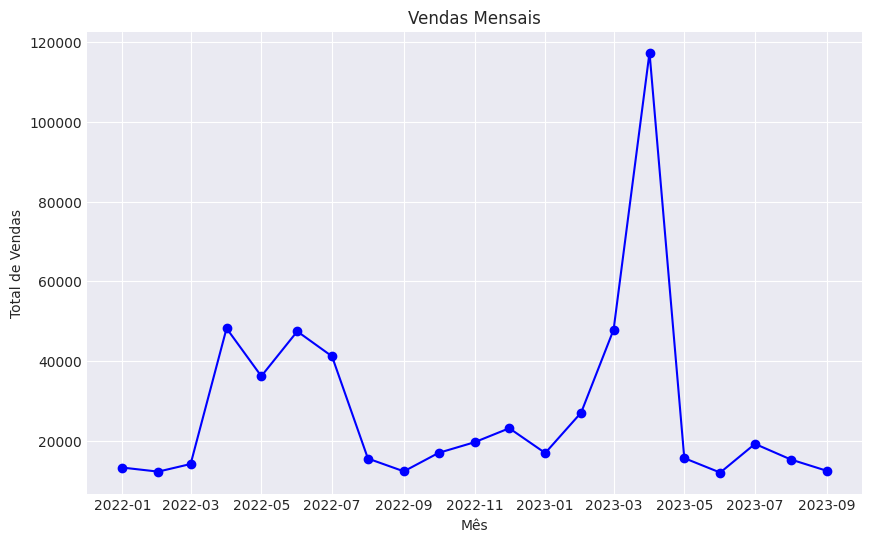

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

## Comparar as Vendas de 2022 e 2023

In [77]:
# Criar uma nova coluna para o ano
data_melted['year'] = data_melted['date'].dt.year

In [78]:
# Agrupar as vendas por mês e por ano
sales_by_year_month = data_melted.groupby([data_melted['date'].dt.month, 'year'])['sales'].sum().unstack()

In [79]:
# Exibir o resultado
print("\nVendas mensais por ano:")
print(sales_by_year_month)


Vendas mensais por ano:
year     2022      2023
date                   
1     13237.0   16888.0
2     12216.0   27025.0
3     14129.0   47835.0
4     48173.0  117368.0
5     36169.0   15605.0
6     47413.0   11977.0
7     41150.0   19178.0
8     15498.0   15255.0
9     12284.0   12422.0
10    16923.0       NaN
11    19590.0       NaN
12    23105.0       NaN


<Figure size 1000x600 with 0 Axes>

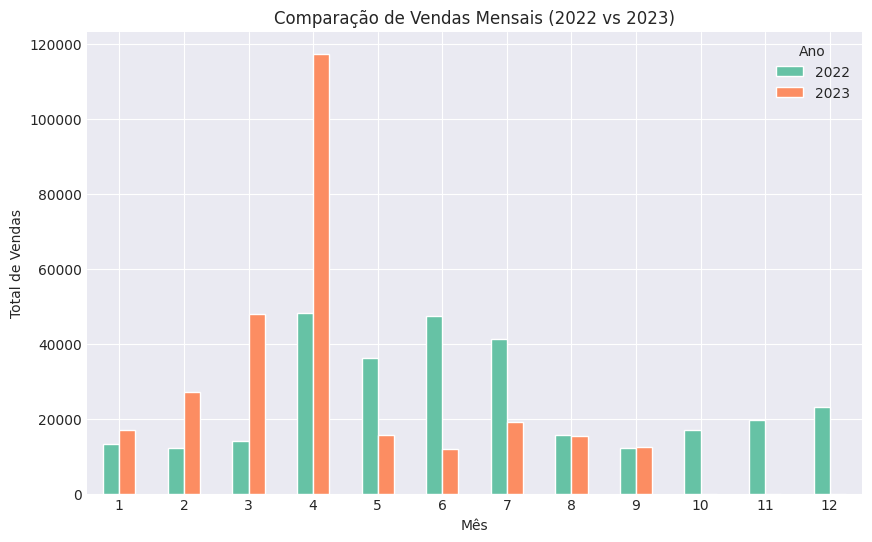

In [80]:
# Visualização: Comparação de Vendas 2022 vs 2023
plt.figure(figsize=(10, 6))
sales_by_year_month.plot(kind='bar', figsize=(10,6))
plt.title('Comparação de Vendas Mensais (2022 vs 2023)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Ano')
plt.show()

## Análise de Tendências

In [81]:
# Calcular a média móvel de 3 meses
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()

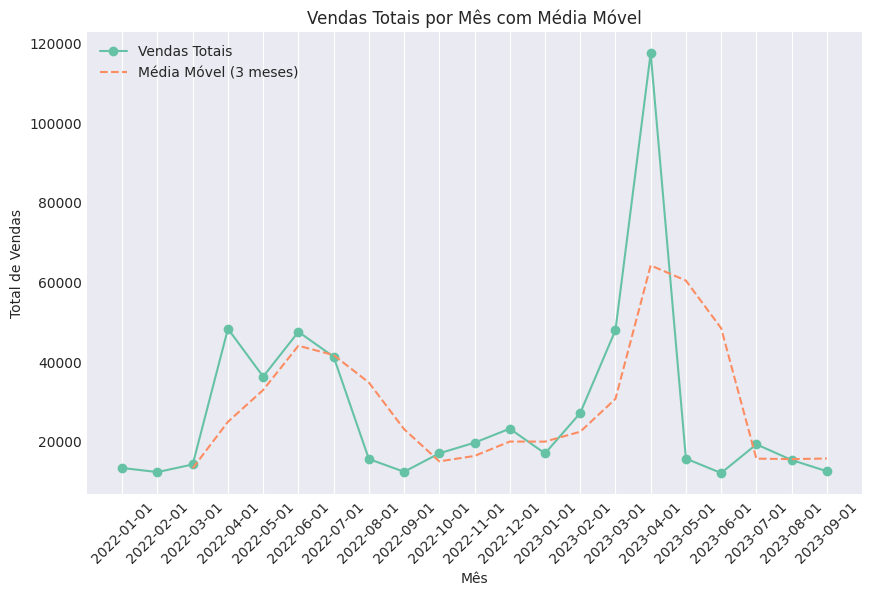

In [82]:
# Plotar vendas totais e média móvel
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales, label='Vendas Totais', marker='o')
plt.plot(monthly_sales_rolling.index.astype(str), monthly_sales_rolling, label='Média Móvel (3 meses)', linestyle='--')
plt.title('Vendas Totais por Mês com Média Móvel')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

## Análise de Vendas por Item ou Loja

In [83]:
# Vendas totais por item
item_sales = data_melted.groupby('item')['sales'].sum().sort_values(ascending=False)

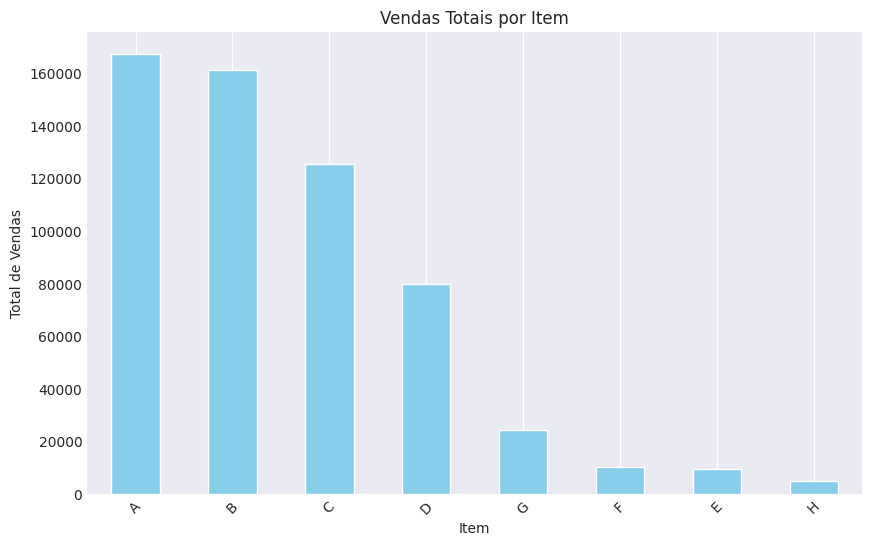

In [84]:
# Plotar vendas totais por item
plt.figure(figsize=(10, 6))
item_sales.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Item')
plt.xlabel('Item')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Estatísticas Descritivas

In [85]:
# Estatísticas descritivas das vendas
sales_stats = data_melted['sales'].describe()
print("Estatísticas Descritivas das Vendas:")
print(sales_stats)


Estatísticas Descritivas das Vendas:
count    113253.000000
mean          5.151652
std          37.310954
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        3800.000000
Name: sales, dtype: float64
